In [22]:
# Importamos las librerías necesarias de scikit-learn
from sklearn.datasets import fetch_openml  # Para descargar el conjunto de datos MNIST
from sklearn.model_selection import train_test_split  # Para dividir los datos en entrenamiento y prueba

# Descargamos el conjunto de datos MNIST desde OpenML
# MNIST contiene imágenes de dígitos escritos a mano (28x28 píxeles, aplanadas en 784 características)
# return_X_y=True devuelve las características (X) y las etiquetas (y) por separado
# as_frame=False devuelve los datos como un array de NumPy en lugar de un DataFrame de pandas
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

# Dividimos el conjunto de datos en entrenamiento y prueba
# Usamos 10,000 muestras para pruebas y el resto para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000  # 10,000 muestras para prueba, el resto para entrenamiento
)

# Imprimimos la cantidad de muestras en cada subconjunto
len(X_train), len(X_test), len(y_train), len(y_test)

(60000, 10000, 60000, 10000)

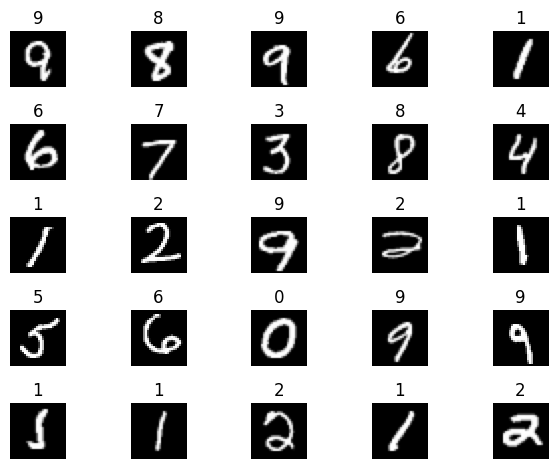

In [23]:
# Importamos las librerías necesarias
import matplotlib.pyplot as plt  # Para graficar imágenes
import random  # Para seleccionar imágenes aleatoriamente

# Creamos una figura con una resolución de 100 DPI
fig = plt.figure(dpi=100)

# Generamos una cuadrícula de 5x5 imágenes (25 en total)
for ix in range(25):
    # Creamos un subplot de 5 filas y 5 columnas
    ax = plt.subplot(5, 5, ix + 1)

    # Seleccionamos un índice aleatorio de los datos de entrenamiento
    i = random.randint(0, len(X_train) - 1)

    # Obtenemos la imagen y su respectiva etiqueta
    img, label = X_train[i], y_train[i]

    # Mostramos la imagen en escala de grises (28x28 píxeles)
    ax.imshow(img.reshape(28, 28), cmap='gray')

    # Establecemos el título con la etiqueta de la imagen
    ax.set_title(label)

    # Quitamos los ejes para una mejor visualización
    ax.axis('off')

# Ajustamos el diseño para evitar solapamientos
plt.tight_layout()

# Mostramos la figura con las imágenes
plt.show()

In [24]:
# Importamos NumPy para manejo de datos numéricos
import numpy as np

# Filtramos las primeras 100 imágenes del dígito '3' en el conjunto de entrenamiento
X_train_3 = X_train[y_train == '3'][:100]

# Filtramos las primeras 100 imágenes que NO sean del dígito '3' en el conjunto de entrenamiento
X_train_no_3 = X_train[y_train != '3'][:100]

# Mostramos la cantidad de imágenes en cada subconjunto
len(X_train_3), len(X_train_no_3)

(100, 100)

In [25]:
def plot_samples(X):
    """
    Función para mostrar 25 imágenes aleatorias de un conjunto de datos.

    Parámetros:
    X (array-like): Conjunto de imágenes en formato aplanado (28x28 píxeles en una sola fila).
    """
    
    # Creamos una figura con resolución de 100 DPI
    fig = plt.figure(dpi=100)

    # Mostramos 25 imágenes en una cuadrícula de 5x5
    for ix in range(25):
        # Creamos un subplot de 5 filas y 5 columnas
        ax = plt.subplot(5, 5, ix + 1)

        # Seleccionamos un índice aleatorio dentro del conjunto X
        i = random.randint(0, len(X) - 1)

        # Obtenemos la imagen correspondiente
        img = X[i]

        # Mostramos la imagen en escala de grises (28x28 píxeles)
        ax.imshow(img.reshape(28, 28), cmap='gray')

        # Quitamos los ejes para una mejor visualización
        ax.axis('off')

    # Ajustamos el diseño para evitar solapamientos
    plt.tight_layout()

    # Mostramos la figura con las imágenes
    plt.show()

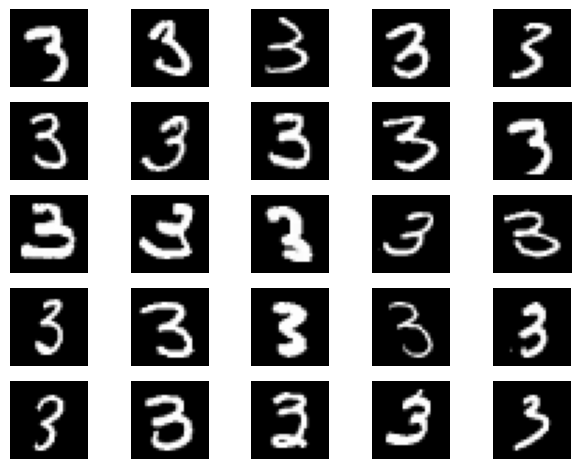

In [26]:
plot_samples(X_train_3)

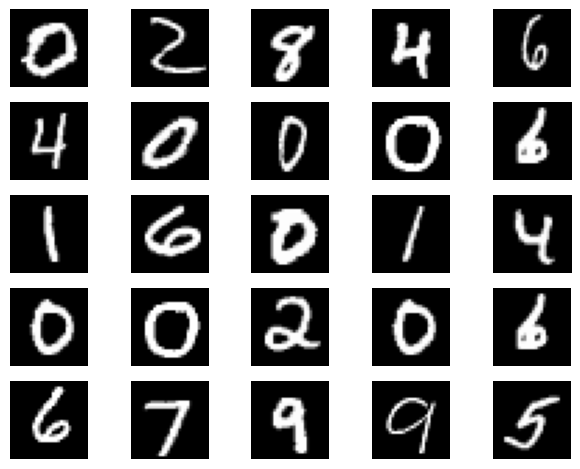

In [27]:
plot_samples(X_train_no_3)

In [28]:
# Importamos las librerías necesarias
import os  # Para manejar archivos y directorios
from pathlib import Path  # Para trabajar con rutas de archivos
from skimage.io import imsave  # Para guardar imágenes en formato PNG
import shutil  # Para eliminar y gestionar directorios
import random  # Para generar nombres aleatorios de archivos

# Definimos el directorio donde se guardará el dataset
path = Path('dataset')

def generate_dataset(X_train_3, X_train_no_3, test_size):
    """
    Genera un conjunto de datos organizado en carpetas para entrenamiento y prueba.
    
    Parámetros:
    - X_train_3 (array-like): Imágenes del dígito "3".
    - X_train_no_3 (array-like): Imágenes de otros dígitos distintos de "3".
    - test_size (int): Cantidad de imágenes que se destinarán al conjunto de prueba.

    Estructura de carpetas creada:
    dataset/
        ├── train/
        │   ├── 3/    (Imágenes de entrenamiento del número "3")
        │   ├── no3/  (Imágenes de entrenamiento de otros números)
        ├── test/
        │   ├── 3/    (Imágenes de prueba del número "3")
        │   ├── no3/  (Imágenes de prueba de otros números)
    """

    # Eliminamos la carpeta del dataset si ya existe y la volvemos a crear
    shutil.rmtree(path, ignore_errors=True)
    os.makedirs(path, exist_ok=True)

    # Definimos los conjuntos de datos: entrenamiento y prueba
    splits = ['train', 'test']
    for split in splits:
        # Creamos las carpetas correspondientes
        os.makedirs(path / split, exist_ok=True)
        os.makedirs(path / split / '3', exist_ok=True)
        os.makedirs(path / split / 'no3', exist_ok=True)

        # Dividimos los datos en entrenamiento y prueba
        if split == 'train':
            X1, X2 = X_train_3[:-test_size], X_train_no_3[:-test_size]  # Entrenamiento
        else:
            X1, X2 = X_train_3[-test_size:], X_train_no_3[-test_size:]  # Prueba

        # Guardamos las imágenes en las carpetas correspondientes
        for x1, x2 in zip(X1, X2):
            # Guardamos imágenes del número "3"
            imsave(path / split / '3' / f'{random.randint(0, 99999):05d}.png', 
                   x1.reshape(28, 28).astype('uint8'))
            
            # Guardamos imágenes de otros números ("no3")
            imsave(path / split / 'no3' / f'{random.randint(0, 99999):05d}.png', 
                   x2.reshape(28, 28).astype('uint8'))

In [29]:
generate_dataset(X_train_3, X_train_no_3, 20)

In [30]:
from glob import glob  # Importamos glob para buscar archivos en las carpetas

def get_paths():
    """
    Busca y obtiene las rutas de las imágenes almacenadas en el dataset.
    
    Retorna:
    - train_3 (list): Lista de rutas de imágenes del número "3" en el conjunto de entrenamiento.
    - train_no3 (list): Lista de rutas de imágenes de otros números en el conjunto de entrenamiento.
    - test_3 (list): Lista de rutas de imágenes del número "3" en el conjunto de prueba.
    - test_no3 (list): Lista de rutas de imágenes de otros números en el conjunto de prueba.
    """
    
    # Obtenemos las rutas de las imágenes en las respectivas carpetas
    train_3 = glob(str(path / 'train' / '3' / '*.png'))  # Imágenes "3" en entrenamiento
    train_no3 = glob(str(path / 'train' / 'no3' / '*.png'))  # Imágenes "no3" en entrenamiento
    test_3 = glob(str(path / 'test' / '3' / '*.png'))  # Imágenes "3" en prueba
    test_no3 = glob(str(path / 'test' / 'no3' / '*.png'))  # Imágenes "no3" en prueba
    
    return train_3, train_no3, test_3, test_no3

# Llamamos a la función para obtener las rutas de los archivos
train_3, train_no3, test_3, test_no3 = get_paths()

# Mostramos la cantidad de imágenes en cada conjunto
len(train_3), len(train_no3), len(test_3), len(test_no3)

(80, 80, 20, 20)

In [31]:
from skimage.io import imread  # Importamos la función imread para leer imágenes desde archivos

def plot_images(paths):
    """
    Muestra 25 imágenes aleatorias a partir de las rutas proporcionadas.

    Parámetros:
    - paths (list): Lista de rutas de imágenes que se quieren visualizar.
    """
    
    # Creamos una figura con resolución de 100 DPI
    fig = plt.figure(dpi=100)

    # Mostramos 25 imágenes en una cuadrícula de 5x5
    for ix in range(25):
        # Creamos un subplot de 5 filas y 5 columnas
        ax = plt.subplot(5, 5, ix + 1)

        # Seleccionamos un índice aleatorio dentro de las rutas de las imágenes
        i = random.randint(0, len(paths) - 1)

        # Leemos la imagen desde el archivo usando imread
        img = imread(paths[i])

        # Mostramos la imagen en escala de grises
        ax.imshow(img, cmap='gray')

        # Quitamos los ejes para una visualización más clara
        ax.axis('off')

    # Ajustamos el diseño para evitar solapamientos de las imágenes
    plt.tight_layout()

    # Mostramos la figura con las imágenes
    plt.show()

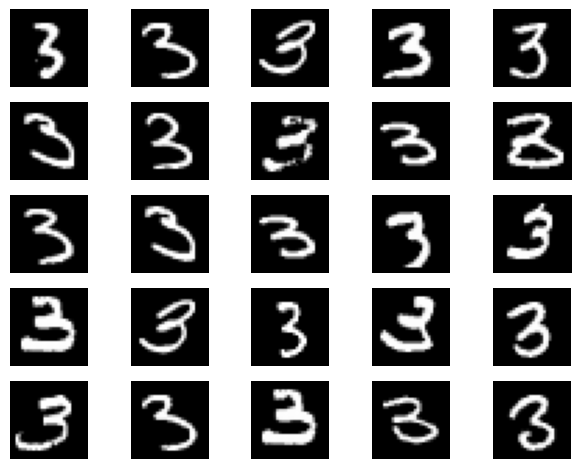

In [32]:
plot_images(train_3)

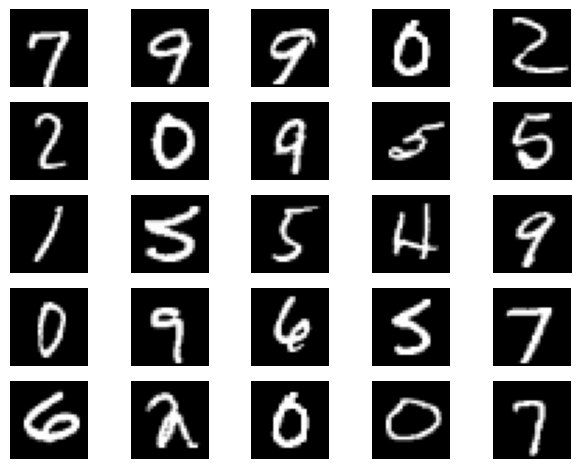

In [33]:
plot_images(train_no3)